# Birdstrikes

by Fasih Atif and Abduvosid Malikov

### Libraries

In [1]:
import os
import pandas as pd 
import numpy as np 

In [2]:
# Matplotlib is the python plotting library 
import matplotlib.pyplot as plt 

# Seaborn is a wrapper for Matplotlib and makes some things easier, generally imported as "sns"
import seaborn as sns 

# Get data

In [3]:
# os.getcwd()
wild_data = pd.read_csv('database.csv')

C:\Users\abc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
wild_data = pd.read_csv('database.csv', low_memory=False) 

### Exploratory Data Analysis

In [5]:
wild_data.shape

(174104, 66)

Number of rows: 174105

Number of columns: 66

In [6]:
pd.set_option('display.max_columns', None)

In [8]:
wild_data.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
wild_data.columns 

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [10]:
# wild_data.dtypes
wild_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [ ]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

by [Suhas_Pote](https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe)

In [ ]:
missing_zero_values_table(wild_data)

In [11]:
null_columns = wild_data.columns[wild_data.isna().any()]
print(wild_data[null_columns].isnull().sum())

Aircraft Type        41030
Aircraft Make        43053
Aircraft Model       51665
Aircraft Mass        46784
Engine Make          50670
Engine Model         52116
Engines              46762
Engine Type          46822
Engine1 Position     47911
Engine2 Position     55389
Engine3 Position    162445
Engine4 Position    171012
Airport                290
State                21976
FAA Region           18902
Warning Issued       97686
Flight Phase         55302
Visibility           64171
Precipitation        85782
Height               70427
Speed               102846
Distance             74391
Species Name            80
Species Quantity      4477
Flight Impact        74639
Fatalities          173539
Injuries            173875
dtype: int64


Birdstrikes after 2010

In [12]:
wild_filtered = wild_data[wild_data['Incident Year'] >= 2010] 

In [13]:
wild_filtered

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
106753,300045,2010,1,1,BUS,BUSINESS,C-310,A,226,21,2.0,13.0,16,2.0,A,4,4.0,NaN,NaN,KPMP,POMPANO BEACH AIRPARK,FL,ASO,Y,TAKEOFF RUN,DAY,NONE,0.0,30.0,0.0,NE1,GULL,1,ABORTED TAKEOFF,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
106754,300390,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,A,04A,3,4.0,23.0,1,2.0,D,1,1.0,NaN,NaN,KMCO,ORLANDO INTL,FL,ASO,Y,TAKEOFF RUN,DAY,RAIN,0.0,120.0,0.0,ZT3,GRACKLE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106755,300264,2010,1,1,RPA,REPUBLIC AIRLINES,EMB-170,A,332,NaN,4.0,22.0,4,2.0,D,1,1.0,NaN,NaN,KBDL,BRADLEY INTL,CT,ANE,Y,CLIMB,DAY,NONE,NaN,NaN,NaN,ZX002,LAPLAND LONGSPUR,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
106756,300069,2010,1,1,WJA,WESTJET,B-737-800,A,148,43,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,PHNL,HONOLULU INTL ARPT,HI,AWP,Y,TAKEOFF RUN,NIGHT,FOG,0.0,NaN,0.0,N5122,PACIFIC GOLDEN-PLOVER,1,NONE,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106757,300163,2010,1,1,DAL,DELTA AIR LINES,B-737-800,A,148,43,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,N,LANDING ROLL,DAY,NONE,0.0,NaN,0.0,N5111,KILLDEER,2-10,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,UNKN,NaN,NaN,NaN,N,NaN,NaN,NONE,NaN,NaN,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,46.0,1,2.0,D,5,5.0,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,NaN,CLIMB,DAY,NONE,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.0,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [16]:
# what = wild_data[wild_data['State'] != 'NaN']
state_filtered = wild_filtered[wild_filtered['State'].notna()]

In [ ]:
state_filtered

In [ ]:
# Weather API starts from which year?

Total number of missing values (NaN) in whole dataframe

Is there a row without missing value? No

In [17]:
# what = wild_filtered.dropna(axis='columns')
rows_no_missing = wild_filtered.dropna()

In [18]:
rows_no_missing

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage


In [19]:
state_filtered['Fatalities'].value_counts()

Series([], Name: Fatalities, dtype: int64)

In [26]:
columns_filtered = state_filtered[['Incident Year', 'Incident Month', 'Incident Day', 'Operator ID', 'Operator', 'Aircraft', 'Airport ID', 'Airport', 'State', 'Flight Phase', 'Visibility', 'Height', 'Speed', 'Distance', 'Species ID', 'Species Name', 'Species Quantity', 'Flight Impact']]

In [27]:
columns_filtered

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,Visibility,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact
106753,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,DAY,0.0,30.0,0.0,NE1,GULL,1,ABORTED TAKEOFF
106754,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,DAY,0.0,120.0,0.0,ZT3,GRACKLE,1,NONE
106755,2010,1,1,RPA,REPUBLIC AIRLINES,EMB-170,KBDL,BRADLEY INTL,CT,CLIMB,DAY,NaN,NaN,NaN,ZX002,LAPLAND LONGSPUR,1,NONE
106756,2010,1,1,WJA,WESTJET,B-737-800,PHNL,HONOLULU INTL ARPT,HI,TAKEOFF RUN,NIGHT,0.0,NaN,0.0,N5122,PACIFIC GOLDEN-PLOVER,1,NONE
106757,2010,1,1,DAL,DELTA AIR LINES,B-737-800,KMIA,MIAMI INTL,FL,LANDING ROLL,DAY,0.0,NaN,0.0,N5111,KILLDEER,2-10,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174098,2015,9,30,FDX,FEDEX EXPRESS,DC-10-10,KCLT,CHARLOTTE/DOUGLAS INTL ARPT,NC,CLIMB,NIGHT,2000.0,210.0,3.0,UNKBS,UNKNOWN SMALL BIRD,1,NaN
174100,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,KDAL,DALLAS LOVE FIELD ARPT,TX,APPROACH,DAY,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE
174101,2015,9,30,BUS,BUSINESS,CITATIONJET,KMIA,MIAMI INTL,FL,CLIMB,DAY,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE
174102,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,KPDX,PORTLAND INTL (OR),OR,DESCENT,NIGHT,6000.0,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE


In [52]:
df_cleaned = columns_filtered.dropna()

In [ ]:
df_cleaned["incident_date"] = df_cleaned["Incident Year"].astype(str) + "-" + df_cleaned["Incident Month"].astype(str) + "-" + df_cleaned["Incident Day"].astype(str)
df_cleaned["incident_date"] = pd.to_datetime(df_cleaned['incident_date'], format= '%Y-%m-%d').astype(str)
# date_list = pd.DataFrame(df_cleaned['incident_date'])
# date_list['incident_date'] = date_list['incident_date'].astype(str)

In [53]:
df_cleaned

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,Visibility,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact
106753,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,DAY,0.0,30.0,0.0,NE1,GULL,1,ABORTED TAKEOFF
106754,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,DAY,0.0,120.0,0.0,ZT3,GRACKLE,1,NONE
106764,2010,1,2,SKW,SKYWEST AIRLINES,CRJ100/200,KSLC,SALT LAKE CITY INTL,UT,LANDING ROLL,DAY,0.0,80.0,0.0,YH004,HORNED LARK,1,NONE
106765,2010,1,2,NWA,NORTHWEST AIRLINES,DC-9,KBWI,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,MD,TAKEOFF RUN,DAY,0.0,140.0,0.0,K33,HAWK,1,NONE
106769,2010,1,2,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,APPROACH,DAY,20.0,120.0,0.0,YI010,TREE SWALLOW,1,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174089,2015,9,30,FDX,FEDEX EXPRESS,B-757-200,KMEM,MEMPHIS INTL,TN,APPROACH,NIGHT,4700.0,240.0,1.0,UNKBM,UNKNOWN MEDIUM BIRD,1,NONE
174093,2015,9,30,FDX,FEDEX EXPRESS,A-300,KMEM,MEMPHIS INTL,TN,APPROACH,NIGHT,2000.0,160.0,5.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE
174094,2015,9,30,AAL,AMERICAN AIRLINES,MD-83,KDFW,DALLAS/FORT WORTH INTL ARPT,TX,CLIMB,NIGHT,10.0,140.0,0.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE
174100,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,KDAL,DALLAS LOVE FIELD ARPT,TX,APPROACH,DAY,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE


There is no missing value in the cleaned dataframe

In [30]:
# df_cleaned.info()
# df_cleaned.isna().sum()
df_cleaned.isna().sum().sum()

0

around 90% of recorded bird strikes occur during daylight, but since this is also when most aircraft fly, strike rates can sometimes actually be higher at night.

https://www.skybrary.aero/index.php/Bird_Behaviour

There are three approaches to reduce the effect of bird strikes. The
aircraft can be designed to be more bird resistant, the birds can be
moved out of the way of the aircraft, or the aircraft can be moved out
of the way of the birds

https://business.esa.int/sites/default/files/Overview%20of%20opportunities%20presented%20by%20new%20technology%20%28GMV%29.pdf

According to the existing statistics, most collisions between birds and aircraftoccur during seasonal bird migration periods and over the territories ofmigratory flights. 

https://www.researchgate.net/publication/228438745_Global_climate_change_bird_migration_and_bird_strike_problems

## Exploratory Data Analysis

In [ ]:
df_cleaned["Operator"].value_counts().head(10)

In [31]:
# Get the numnber of occurances of each operator
operator_counts = df_cleaned.Operator.value_counts()

# Split and Save the Operator names in a variable
operators = operator_counts.index

# Split and Save the counts in another variable
counts = operator_counts.values

In [ ]:
# Create barplot object
plt.xticks(rotation=90)

# Add the x-axis title
plt.xlabel("Airline operators", fontsize=15)

# Add the y-axis title
plt.ylabel("Number of birdstrikes", fontsize=15)

# Add the plot title
plt.title("Birdstrikes per Airline Operator", fontsize=20)

# Create the plot
barplot = sns.barplot(x=operators[:10], y=counts[:10])

In [ ]:
# Add the x-axis title
plt.xlabel("Incident Year",  fontsize=15)

# Add the y-axis title
plt.ylabel("Number of birdstrikes", fontsize=15)

# Add the plot title
plt.title("Incidents over years", fontsize=20)

# Create the plot
barplot = sns.lineplot(data=df_cleaned.groupby('Incident Year').size())

In [ ]:
# Add the x-axis title
plt.xlabel("Incident Month",  fontsize=15)

# Add the y-axis title
plt.ylabel("Number of birdstrikes", fontsize=15)

# Add the plot title
plt.title("Incidents over months", fontsize=20)

df_cleaned.groupby('Incident Month').size().plot()

In [32]:
phases = df_cleaned.groupby('Flight Phase').size().sort_values(ascending=False)

In [33]:
phases_df = phases.to_frame().drop(index = ['PARKED', 'LOCAL', 'DEPARTURE','TAXI'])

In [34]:
# phases_df.columns
phases_df

,0
Flight Phase,
APPROACH,6069
LANDING ROLL,2588
TAKEOFF RUN,2539
CLIMB,2241
DESCENT,212


In [ ]:
my_labels = list(phases_df.index)
plt.pie(phases_df,labels=my_labels, autopct='%1.1f%%')
plt.title('Flight phases')
plt.axis('equal')
# plt.figure(figsize = [60.4, 4.8])
plt.show()

Mostly, birdstrikes occured when the aircraft was in APPROACH flight phase

In [35]:
state_counts = df_cleaned['State'].value_counts()
states = state_counts.index
counts = state_counts.values

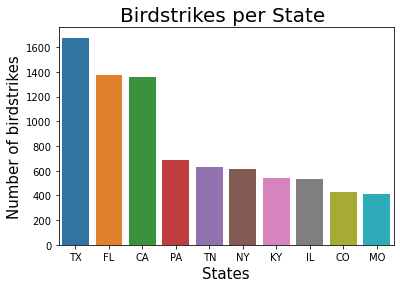

In [36]:
# df_cleaned.groupby('State').size().sort_values(ascending=False)
# plt.xticks(rotation=90)
plt.xlabel("States", fontsize=15)
plt.ylabel("Number of birdstrikes", fontsize=15)
plt.title("Birdstrikes per State ", fontsize=20)
barplot = sns.barplot(x=states[:10], y=counts[:10])

In [37]:
# 10585 birdstrikes occured in 0 height
# df_cleaned.groupby('Height').size().sort_values(ascending=False)

In [38]:
# Top states
# df_cleaned.groupby('State').size().sort_values(ascending=False)
state_counts = df_cleaned['State'].value_counts()
states = state_counts.index
counts = state_counts.values
states[:20]

Index(['TX', 'FL', 'CA', 'PA', 'TN', 'NY', 'KY', 'IL', 'CO', 'MO', 'OH', 'HI',
       'NC', 'NJ', 'MD', 'MA', 'NE', 'IN', 'GA', 'LA'],
      dtype='object')

In [ ]:
# Compute group sizes
# Top species(birds)
# df_cleaned.groupby('Species Name').size().sort_values(ascending=False)

# UNKNOWN SMALL BIRD                                    7084
# UNKNOWN MEDIUM BIRD                                   2279
# MOURNING DOVE

In [39]:
airport_counts = df_cleaned['Airport ID'].value_counts()

In [40]:
airport_counts = df_cleaned.groupby('Airport ID').size().sort_values(ascending=False)[airport_counts > 100]
# airport_counts[airport_counts > 100]

In [41]:
# df_airports = airport_counts.to_frame()
df_airports = pd.DataFrame({'Airport ID':airport_counts.index, 'Birdstrikes_N':airport_counts.values})

## Save files to excel

In [42]:
df_airports.to_csv('airports.csv', index = False)

airport codes:
https://datahub.io/core/airport-codes

In [54]:
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.drop(columns = ['index'])

In [56]:
df_cleaned.to_csv('df_cleaned.csv', index = False)

In [58]:
df_cleaned.head()

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,Visibility,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact
0,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,DAY,0.0,30.0,0.0,NE1,GULL,1,ABORTED TAKEOFF
1,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,DAY,0.0,120.0,0.0,ZT3,GRACKLE,1,NONE
2,2010,1,2,SKW,SKYWEST AIRLINES,CRJ100/200,KSLC,SALT LAKE CITY INTL,UT,LANDING ROLL,DAY,0.0,80.0,0.0,YH004,HORNED LARK,1,NONE
3,2010,1,2,NWA,NORTHWEST AIRLINES,DC-9,KBWI,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,MD,TAKEOFF RUN,DAY,0.0,140.0,0.0,K33,HAWK,1,NONE
4,2010,1,2,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,APPROACH,DAY,20.0,120.0,0.0,YI010,TREE SWALLOW,1,NONE
